In [1]:
'''
1. This code provide easy read-in function as required by analyzing huge data sets such as your NMR experiments.
2. Methods of analyzing is not included, try yourself.
3. Author: Chen, Wun-Yi (r09244001@g.ntu.edu.tw)
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import integrate
import math
from operator import itemgetter

In [7]:
### Read the csv file from the same directory, and name it as 'hrd'
hrd= pd.read_csv('spin_echo.csv',sep=',',error_bad_lines=False)

In [20]:
### Get the list of hrd, the column name
a=list(hrd)
print(a)

['Time(s)', 'CH1(V)', 'CH2(V)', 'CH3(V)']


In [38]:
### print the second column of a
print(a[1])
print(len(hrd))

CH1(V)
869000


Text(0, 0.5, 'V')

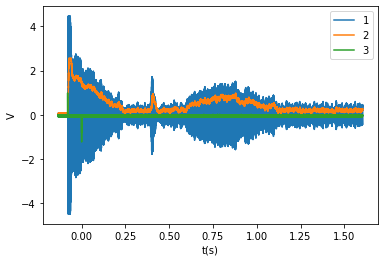

In [15]:
### plot all of the column with respect to time
for i in range(1,3,1):
    plot, =plt.plot(hrd[a[0]],hrd[a[i]],label=i)

### Set the location of figure-example
plt.legend(loc=0)

plt.xlabel("t(s)")
plt.ylabel("V")

#plt.xlim(-1.0,1)
#plt.ylim(30,10) #This can also reverse the axis

In [24]:
print(min(hrd[a[3]]))

### print the end time of second pulse
print(max(hrd[a[0]][hrd[a[3]]==min(hrd[a[3]])]))

-1.23676
7.8e-05


Text(0, 0.5, 'V')

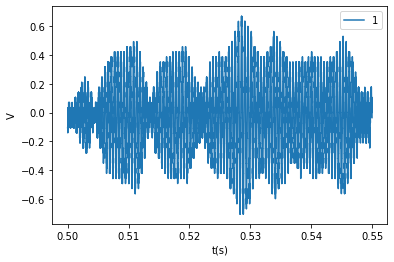

In [32]:
### plot all of the column with respect to time
for i in range(1,2,1):
    plot, =plt.plot(hrd[a[0]][hrd[a[0]]>0.5][hrd[a[0]]<0.55],hrd[a[i]][hrd[a[0]]>0.5][hrd[a[0]]<0.55],label=i)

### Set the location of figure-example
plt.legend(loc=0)

plt.xlabel("t(s)")
plt.ylabel("V")

#plt.xlim(0.5,0.55)
#plt.ylim(30,10) #This can also reverse the axis

In [113]:
### fast fourier transfer
from scipy.fftpack import fft, rfft, rfftfreq

### Define the ch. you want to fft
cut=hrd[hrd[a[0]]>=0.5]
cut=cut[cut[a[0]]<=1.6]
l=cut[a[1]]
y=rfft(np.array(l))

### Convert to frequency space: fftfreq(number of points, time space)
N=len(cut[a[0]])
T=0.000002
print(N*T)
x=rfftfreq(N,T)

1.100006


In [114]:
print(min(cut[a[0]])-max(cut[a[0]]))

-1.1


[1927.26221493]


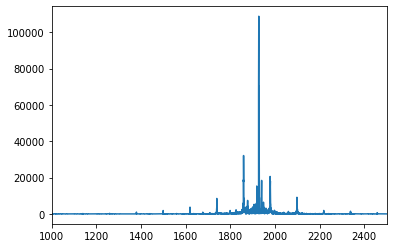

In [118]:
### plot A-V
plt.plot(x,abs(y))
plt.xlim(1000,2500)

### print the peak frequency
print(x[abs(y)==max(y)])